# Airbnb Price Prediction Project

In [1]:
import warnings

# Suppress all DeprecationWarnings
warnings.simplefilter("ignore", category=DeprecationWarning)

## **1. Introduction**

This project aims to develop a regression model to predict the price of Airbnb listings based on various features such as property type, room type, number of reviews, location, and amenities. The insights from this analysis will help Airbnb hosts understand the key drivers of price and make data-driven decisions.

## **2. Data Exploration and Preprocessing**

### **2.1 Import Libraries**

Before starting, we need to import the necessary Python libraries for data analysis, visualization, and machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


### **2.2 Load the Dataset**

Load the dataset into a Pandas DataFrame for analysis.

In [3]:
# Load the dataset
data = pd.read_csv('airbnb_data.csv')  # Replace with your dataset file path
data.head()


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


### **2.3 Analyze the Dataset**

Explore the dataset to understand its structure, check for missing values, and identify trends or outliers.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

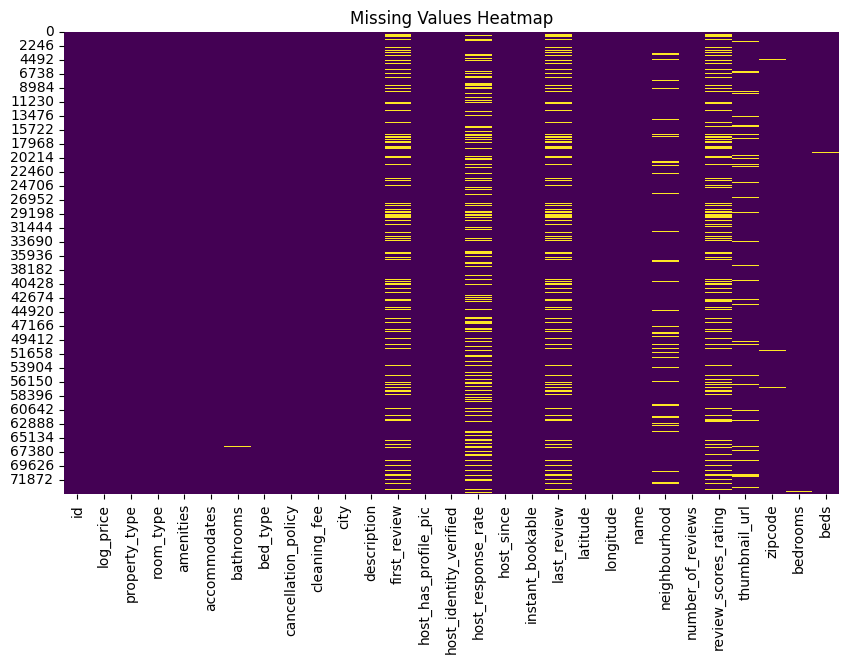

In [4]:
# Check dataset information
data.info()

# Check for missing values
data.isnull().sum()

# Summary statistics
data.describe()

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


### **2.4 Handle Missing Values**

Decide how to handle missing values (e.g., imputation or removal).

In [5]:
# Fill missing values for numerical columns with the median
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Fill missing values for categorical columns with the mode
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])


### **2.5 Feature Engineering**

Create new features that might be useful for the model, such as:

- Number of amenities
- Popularity of the neighborhood
- Host activity metrics

In [6]:
# Example: Create a feature for the number of amenities
data['num_amenities'] = data['amenities'].apply(lambda x: len(x.split(',')))

# Example: Create a feature for neighborhood popularity
neighborhood_popularity = data['neighbourhood'].value_counts(normalize=True)
data['neighbourhood_popularity'] = data['neighbourhood'].map(neighborhood_popularity)


### **2.6 Data Visualization**

Visualize trends and relationships in the data.

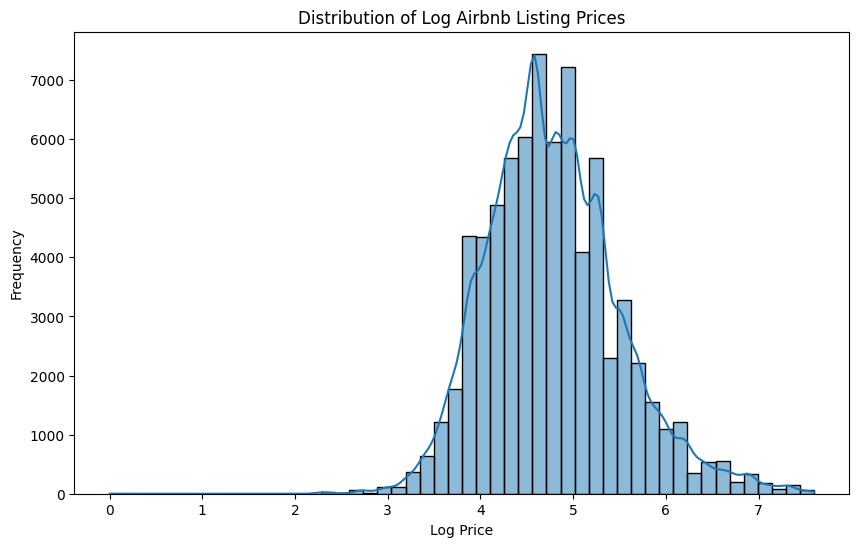

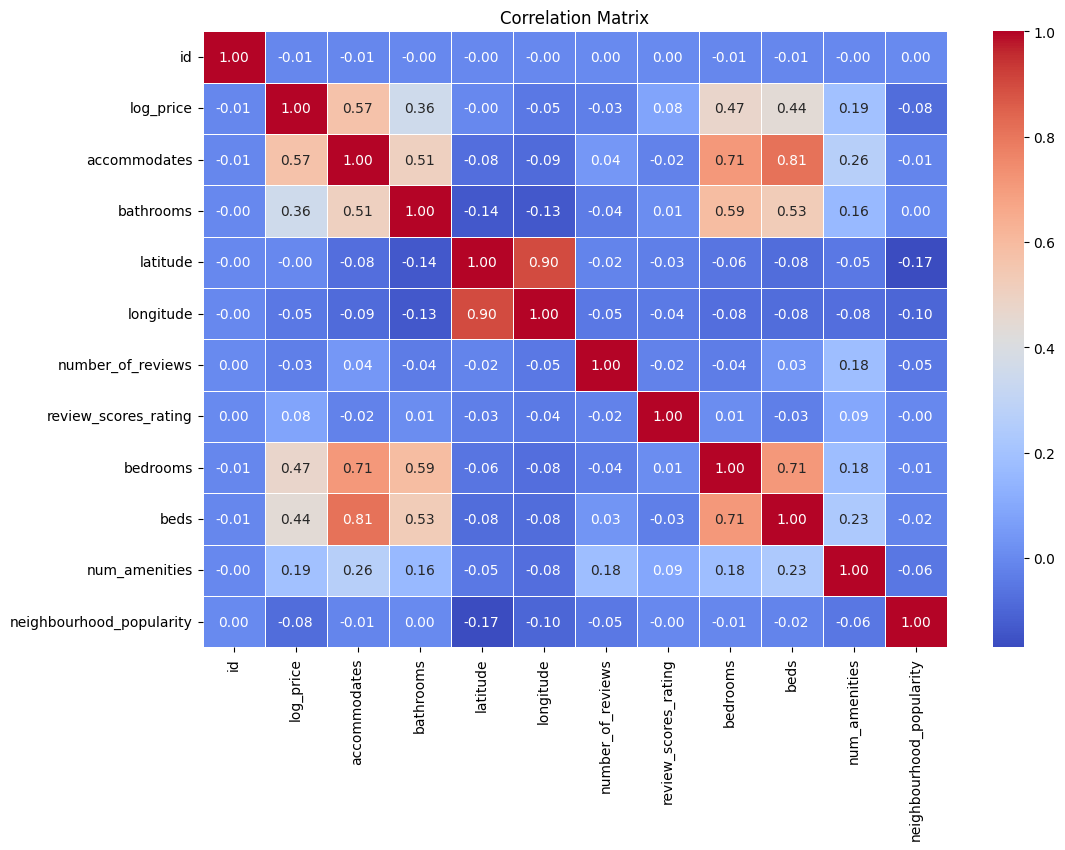

In [7]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Plot the distribution of log-transformed prices
plt.figure(figsize=(10, 6))
sns.histplot(data['log_price'], bins=50, kde=True)
plt.title('Distribution of Log Airbnb Listing Prices')
plt.xlabel('Log Price')  # Corrected label
plt.ylabel('Frequency')
plt.show()

# Compute the correlation matrix for numeric columns only
numeric_data = data.select_dtypes(include=['number'])

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## **3. Model Development**

### **3.1 Split the Data**

Divide the dataset into training, validation, and testing sets.

In [8]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop('log_price', axis=1)  # Correct column name
y = data['log_price']  # Use log-transformed price as target

# Optionally, drop non-numeric columns if they are not encoded
X = X.select_dtypes(include=['number'])  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **3.2 Preprocessing Pipeline**

Create a preprocessing pipeline to handle numerical and categorical features.

In [9]:
# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


### **3.3 Build and Train Models**

Build and train different regression models, such as Linear Regression, Decision Tree, Random Forest, etc.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

# Train and evaluate models
for name, model in models.items():
    # Create a pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Evaluate the model
    score = pipeline.score(X_test, y_test)
    print(f"{name} R² Score: {score:.4f}")


Linear Regression R² Score: 0.3557
Decision Tree R² Score: 0.2742
Random Forest R² Score: 0.6326
SVR R² Score: 0.4987
KNN R² Score: 0.4139


### **3.4 Hyperparameter Tuning**

Use GridSearchCV to find the best hyperparameters for each model.

In [11]:
# Example: Tuning Random Forest
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', RandomForestRegressor(random_state=42))])

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best R² Score for Random Forest:", grid_search.best_score_)


Best Parameters for Random Forest: {'model__max_depth': 20, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best R² Score for Random Forest: 0.6392342952253292


## **4. Model Evaluation**

### **4.1 Evaluate Model Performance**

Evaluate the model using metrics like RMSE, MAE, and R².

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")


RMSE: 0.43
MAE: 0.32
R²: 0.6379


### **4.2 Visualize Predictions**

Visualize the actual vs. predicted prices.

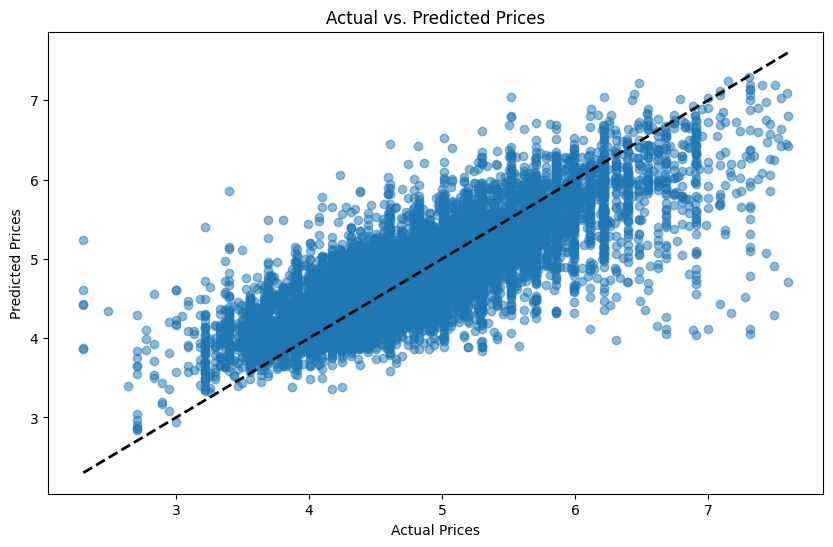

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()


## **5. Conclusion**

Summarize the findings, including the best-performing model and its key drivers of price. Provide actionable insights for Airbnb hosts.